<a href="https://colab.research.google.com/github/BimsaraS99/new-method-for-contour-corner-detection/blob/main/method_for_contour_corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

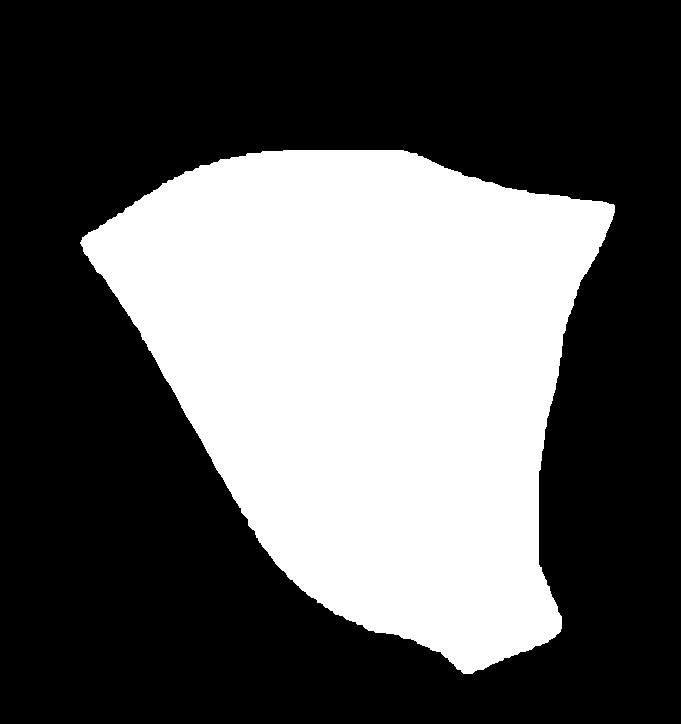

In [1707]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required to show images in Colab

# Path to your image file in Google Drive
image_path = '/content/Untitled.png'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

# Display the binary image
cv2_imshow(binary)

In [1708]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

epsilon = 0.003 * cv2.arcLength(largest_contour, True)  # Adjust epsilon as needed
largest_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

In [1709]:
original_image = np.zeros_like(image)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
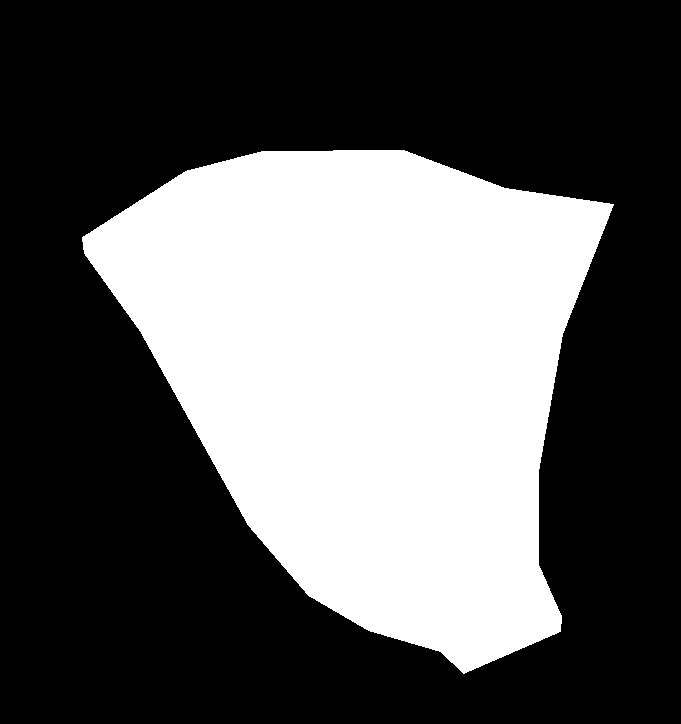

In [1710]:
height, width, channels = image.shape

# Create a blank image of the same dimensions and type
blank_image = np.zeros((height, width, channels), dtype=np.uint8)
cv2.drawContours(original_image, [largest_contour], -1, (255, 255, 255), -1)


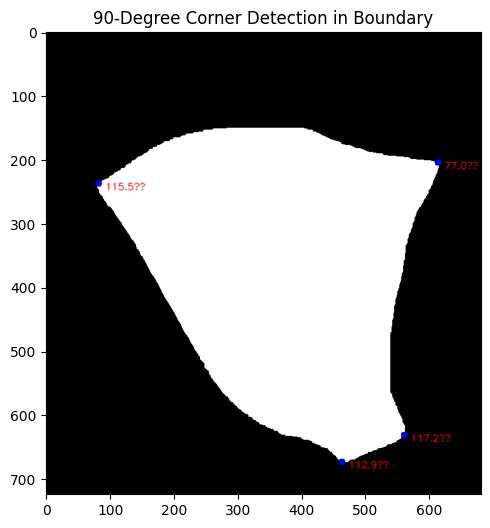

In [1711]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
image = binary

# Function to calculate angle between three points
def calculate_angle(p1, p2, p3):
    a = np.array(p1) - np.array(p2)
    b = np.array(p3) - np.array(p2)
    angle = np.arctan2(b[1], b[0]) - np.arctan2(a[1], a[0])
    angle = np.degrees(angle)
    if angle < 0:
        angle += 360
    return angle

# Calculate angles between consecutive points on the contour
angles = []
for i in range(len(largest_contour)):
    p1 = largest_contour[i - 1][0]
    p2 = largest_contour[i][0]
    p3 = largest_contour[(i + 1) % len(largest_contour)][0]
    angle = calculate_angle(p1, p2, p3)
    angles.append(angle)

# Detect 90-degree corners
corners = [i for i, angle in enumerate(angles) if 20 <= angle <= 150 or 220 <= angle <= 340]  # Threshold for 90-degree corners

# Draw the contour and highlight 90-degree corners
corner_detection_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for i in corners:
    cv2.circle(corner_detection_image, tuple(largest_contour[i][0]), 5, (0, 0, 255), -1)
    angle_text = f"{angles[i]:.1f}°"
    cv2.putText(corner_detection_image, angle_text, tuple(largest_contour[i][0] + np.array([10, 10])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(corner_detection_image)
plt.title('90-Degree Corner Detection in Boundary')
plt.show()
